<a href="https://colab.research.google.com/github/onkarkurhe10/AR-VR-INTERFACE-DESIGN/blob/main/solarenergyprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("Solar_Energy_hiprediction.csv")
df.head()

,State,Year,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Usage (billion ),Domestic Usage (billion),total kwh
0,Rajasthan,2014,8.19,2335.9,133886.0,217.78,173.96,1.130
1,Gujarat,2023,70.70,2896.7,33151.7,283.42,169.84,2.340
2,Karnataka,2003,6.11,653.0,178073.6,257.51,257.38,3.656
3,Tamil Nadu,2016,7.20,972.3,32349.0,204.25,218.42,4.577
4,Andhra Pradesh.,2006,9.40,825.5,95002.2,281.18,27.66,6.506


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         5 non-null      object 
 1   Year                          5 non-null      int64  
 2   Population (millions)         5 non-null      float64
 3   Annual Rainfall (mm)          5 non-null      float64
 4   Agricultural Land (sq km)     5 non-null      float64
 5   Industrial  Usage (billion )  5 non-null      float64
 6   Domestic  Usage (billion)     5 non-null      float64
 7   total kwh                     5 non-null      float64
dtypes: float64(6), int64(1), object(1)
memory usage: 452.0+ bytes


In [4]:
df.describe()

,Year,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Usage (billion ),Domestic Usage (billion),total kwh
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2012.400000,20.320000,1536.680000,94492.500000,248.828000,169.452000,3.641800
std,8.018728,28.189476,1011.632237,63565.745985,36.296735,86.969308,2.066535
min,2003.000000,6.110000,653.000000,32349.000000,204.250000,27.660000,1.130000
25%,2006.000000,7.200000,825.500000,33151.700000,217.780000,169.840000,2.340000
50%,2014.000000,8.190000,972.300000,95002.200000,257.510000,173.960000,3.656000
75%,2016.000000,9.400000,2335.900000,133886.000000,281.180000,218.420000,4.577000
max,2023.000000,70.700000,2896.700000,178073.600000,283.420000,257.380000,6.506000


In [5]:
df.isnull().sum()

,0
State,0
Year,0
Population (millions),0
Annual Rainfall (mm),0
Agricultural Land (sq km),0
Industrial Usage (billion ),0
Domestic Usage (billion),0
total kwh,0


[]

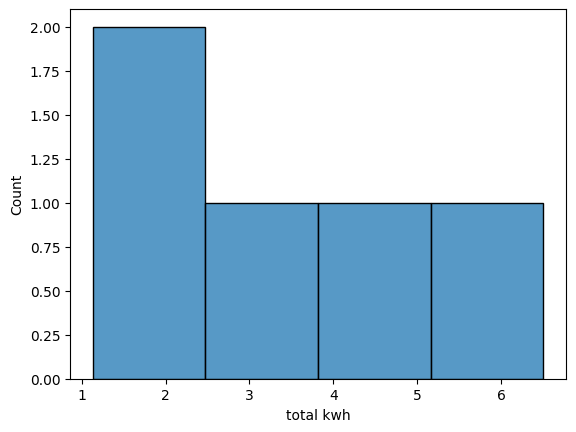

In [6]:
sns.histplot(df["total kwh"])
plt.plot()

In [7]:
# Step 2: Preprocess Data
# Encode categorical column 'State'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [8]:
df.head()

,State,Year,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Usage (billion ),Domestic Usage (billion),total kwh
0,3,2014,8.19,2335.9,133886.0,217.78,173.96,1.130
1,1,2023,70.70,2896.7,33151.7,283.42,169.84,2.340
2,2,2003,6.11,653.0,178073.6,257.51,257.38,3.656
3,4,2016,7.20,972.3,32349.0,204.25,218.42,4.577
4,0,2006,9.40,825.5,95002.2,281.18,27.66,6.506


In [9]:
# Drop Year column as it is not needed
df.drop(columns=["Year"],inplace=True)

In [10]:
df.head()

,State,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Usage (billion ),Domestic Usage (billion),total kwh
0,3,8.19,2335.9,133886.0,217.78,173.96,1.130
1,1,70.70,2896.7,33151.7,283.42,169.84,2.340
2,2,6.11,653.0,178073.6,257.51,257.38,3.656
3,4,7.20,972.3,32349.0,204.25,218.42,4.577
4,0,9.40,825.5,95002.2,281.18,27.66,6.506


In [11]:
# Step 3: seperate x and y variable

x = df.drop(columns=["total kwh"])  # Features
y = df["total kwh"]  # Target variable

In [12]:
# Step 4: Split data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
# Step 6: Train the Linear Regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)


LinearRegression()

In [14]:
# Step 7: Make predictions
ypred = model.predict(xtest)

In [15]:
# Step 8: Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 1.2668430606015182
Mean Squared Error: 1.604891340194222
R-squared Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
